In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [87]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = 20,10

url = 'https://www.epa.gov/sites/production/files/2016-12/state_tier1_90-16.xls'
data = urllib.urlretrieve(url, filename="state_tier1_90-16.xls")
data = pd.read_excel('./state_tier1_90-16.xls', sheetname='state_trends', header=1)

In [88]:
#create dataframe for NJ only

nj = data[data['STATE_ABBR']=='NJ']

In [89]:
#thank you caitlin
#this essentially pivots the data and creates a year column so that it is easier to analyze

emis_cols = [i for i in nj.columns if "emissions" in i]
not_emis = [i for i in nj.columns if i not in emis_cols]
nj = pd.melt(nj, id_vars= not_emis, value_vars= emis_cols)
nj['variable'] = [int("19" + i) if int(i) >= 90 else int("20"+ i) for i in nj['variable'].str.replace('emissions','')]
nj.rename(columns = {"value":"emissions",'variable':"year"}, inplace=True)

In [90]:
#drop columns that are not needed

nj.drop(['STATE_FIPS','tier1_code'], axis=1, inplace=True)

In [91]:
#dataframe for total emissions per year
#resetting index on the same line creates a percent change for years - must be broken into two lines

YoY = nj.groupby(['year']).sum().pct_change()
YoY = YoY.reset_index()
YoY.rename(columns={'emissions':'percent_change'}, inplace=True)
YoY = YoY.loc[YoY['year']!=1990]

In [92]:
#create dataframe for specific industries

fuel_combustion = ['FUEL COMB. ELEC. UTIL.','FUEL COMB. INDUSTRIAL','FUEL COMB. OTHER']
nj_combustion = nj[nj['tier1_description'].isin(fuel_combustion)]

## In New Jersey, the majority of emissions come from Carbon Monoxide (CO). It is a colorless, odorless gas that is very harmful if breathed. 

## In the right-hand chart, we can see that roughly 50% of Carbon Monoxide emissions are from a large amount of small pollutors. 

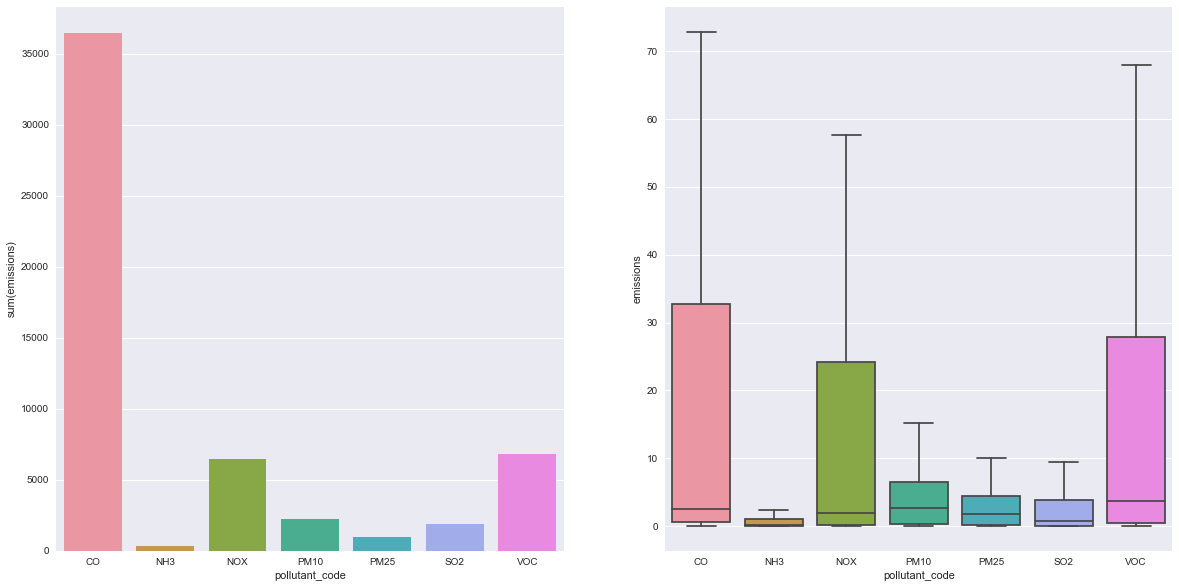

In [93]:
f, ax = plt.subplots(1,2, sharex=True, sharey=False)
v = sns.barplot(x=nj.pollutant_code, y=nj.emissions, ci=None, estimator=sum, ax=ax[0])
t = sns.boxplot(data=nj, x='pollutant_code', y='emissions', showfliers=False)

## It is no surprise that New Jerseys top sources of Carbon Monoxide emissions are Highway & Off-Highway Vehicles. The Public Transportation infrastructure is lacking to say the least...

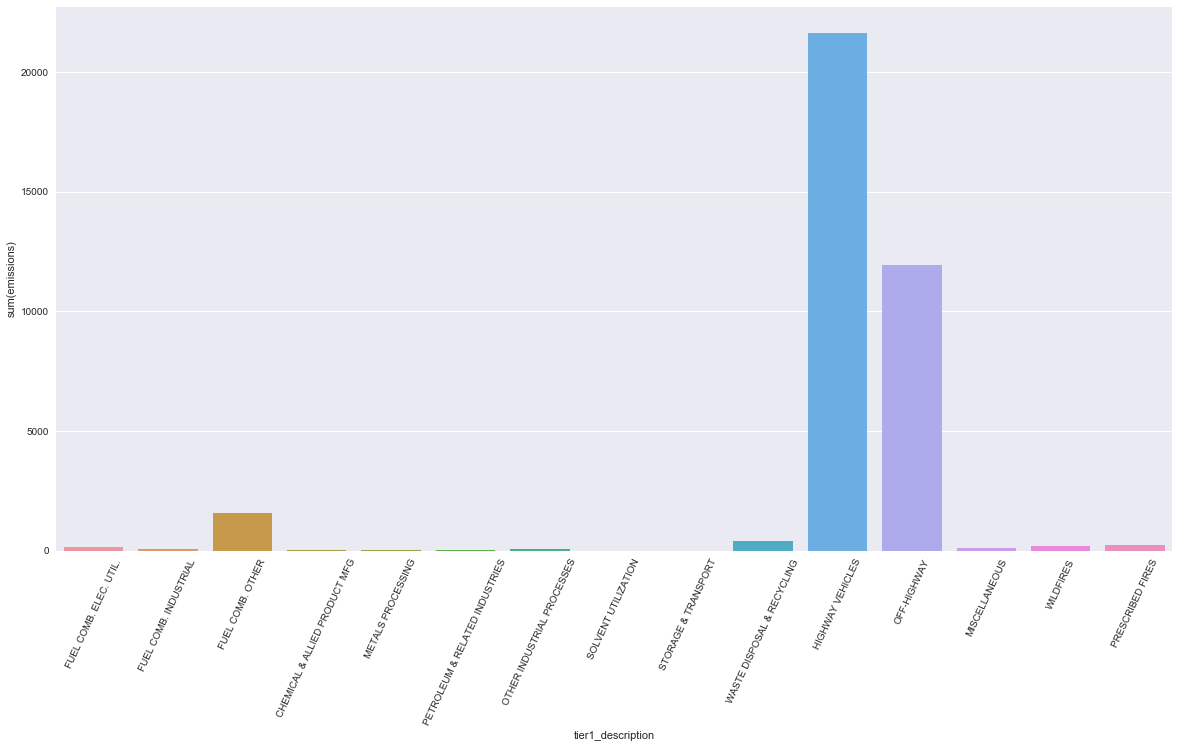

In [94]:
t = sns.barplot(data=nj[nj['pollutant_code']=='CO'], x='tier1_description', y='emissions', ci=None, estimator=sum)
plt.setp(t.get_xticklabels(), rotation=65)
plt.show()

## Nitrogen Oxides (NOX), is the most harmful gas when measured unit for unit. It is primarily generated through fuel combustion. Once again, it is no surprise that Vehicles are the top contributors to these harmful emissions. 

## I hadn't even thought about the emissions coming from the other various forms of fuel combustion.

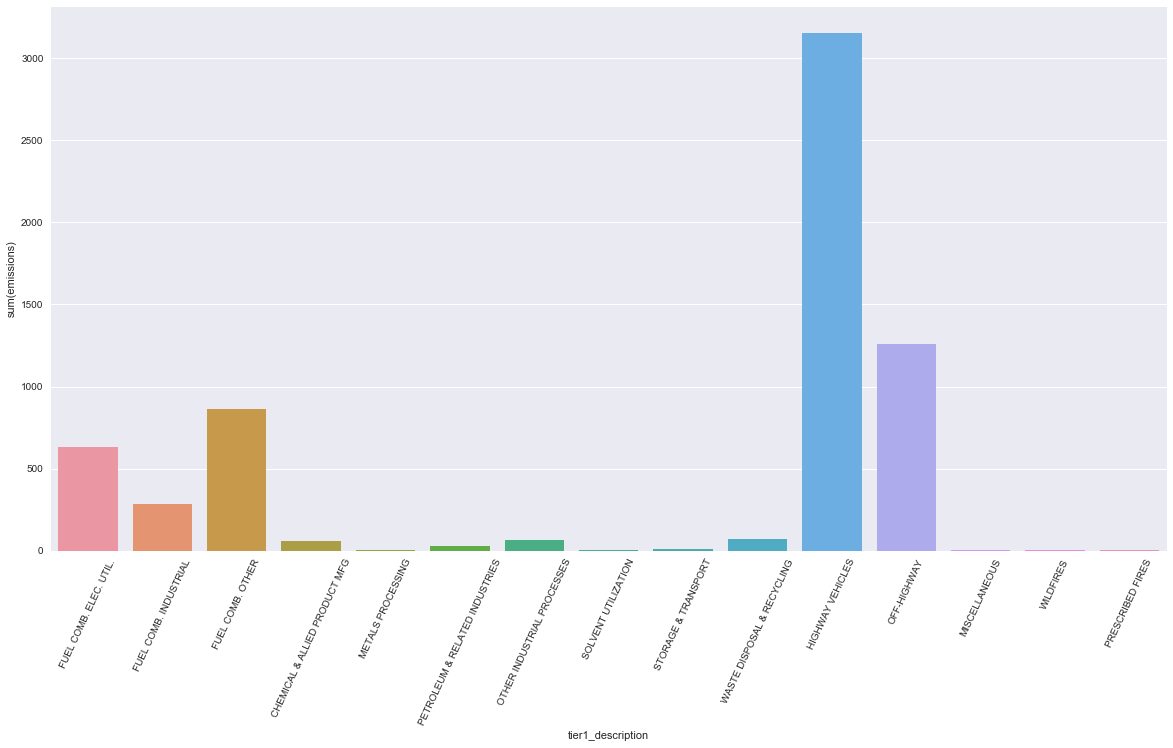

In [95]:
z = sns.barplot(data=nj[nj['pollutant_code']=='NOX'], x='tier1_description', y='emissions', ci=None, estimator=sum)
plt.setp(z.get_xticklabels(), rotation=65)
plt.show()

## New Jersey has been getting better. In the past 21 years (missing '91-'95 so 1990 has been removed for this section), there have only been two years where emissions increased from the previous year. 

### Top chart shows annual sum of emissions
### Bottom chart shows YoY change

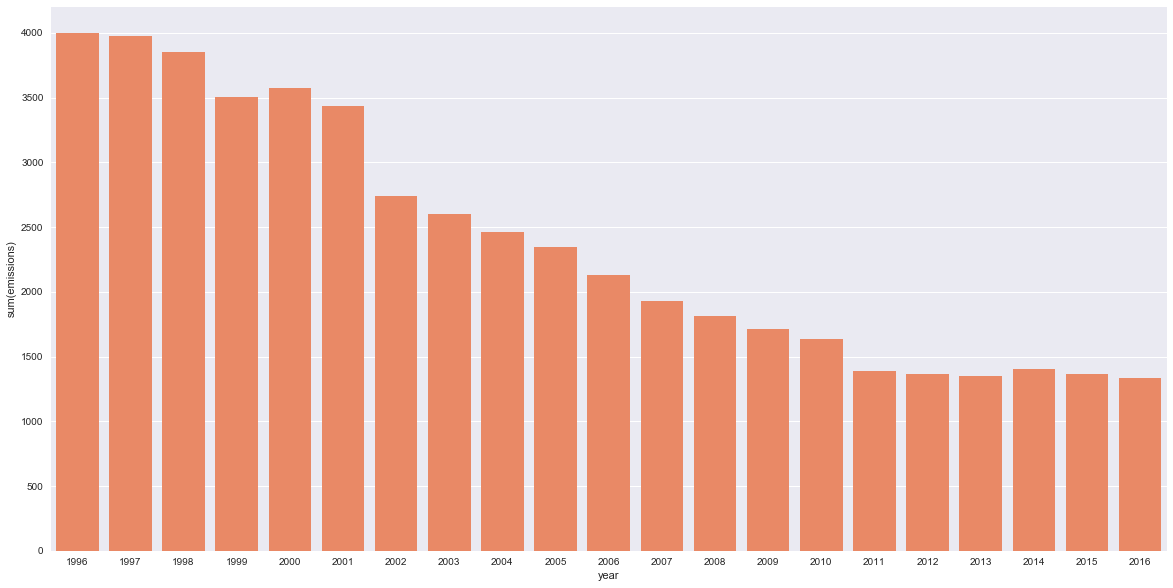

In [96]:
k = sns.barplot(data=nj[nj['year']!=1990], x='year', y='emissions', ci=None, color='coral', estimator=sum)

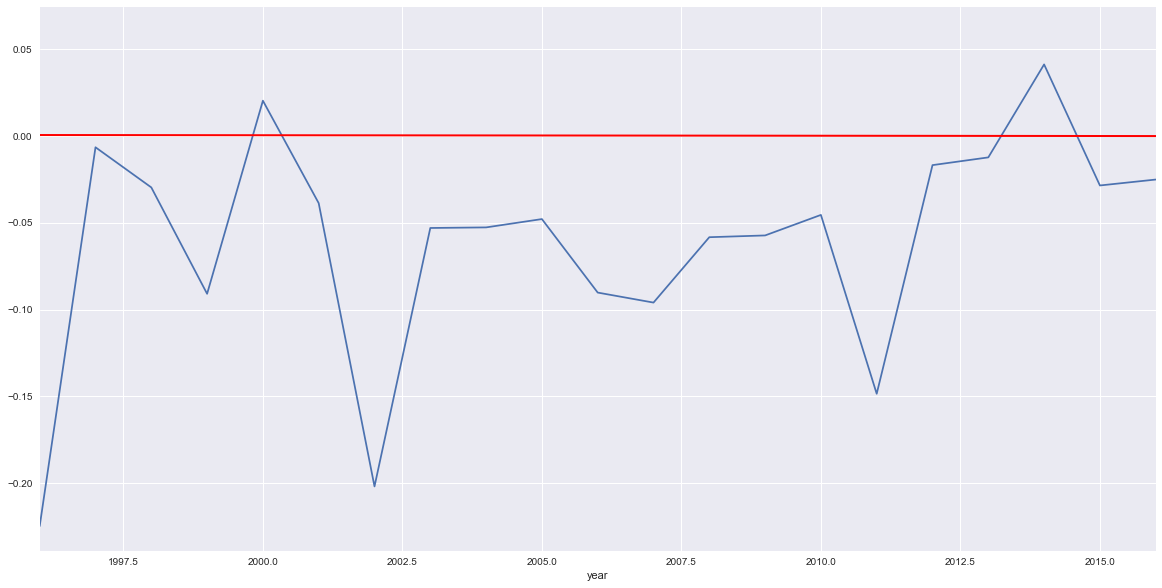

In [97]:
g = sns.tsplot(data=YoY['percent_change'], time=YoY['year'])
g.set_xlim(YoY['year'].min(), YoY['year'].max())
plt.plot([0,2016], [0.06,0], 'b-', linewidth=2, c='red')
plt.show()